# Multilayer Perceptron
The Multilayer Perceptron was developed to tackle this limitation. It is a neural network where the mapping between inputs and output is non-linear.

A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes a threshold, like ReLU or sigmoid, neurons in a Multilayer Perceptron can use any arbitrary activation function.

<p align="center">
    <img src="MP1.png" width="700">
</p>

Multilayer Perceptron falls under the category of feedforward algorithms, because inputs are combined with the initial weights in a weighted sum and subjected to the activation function, just like in the Perceptron. But the difference is that each linear combination is propagated to the next layer.

Each layer is feeding the next one with the result of their computation, their internal representation of the data. This goes all the way through the hidden layers to the output layer.

If the algorithm only computed the weighted sums in each neuron, propagated results to the output layer, and stopped there, it wouldn’t be able to learn the weights that minimize the cost function. If the algorithm only computed one iteration, there would be no actual learning.

This is where Backpropagation comes into play.

Backpropagation is the learning mechanism that allows the Multilayer Perceptron to iteratively adjust the weights in the network, with the goal of minimizing the cost function.

There is one hard requirement for backpropagation to work properly. The function that combines inputs and weights in a neuron, for instance the weighted sum, and the threshold function, for instance ReLU, must be differentiable. These functions must have a bounded derivative, because Gradient Descent is typically the optimization function used in MultiLayer Perceptron.

In each iteration, after the weighted sums are forwarded through all layers, the gradient of the Mean Squared Error is computed across all input and output pairs. Then, to propagate it back, the weights of the first hidden layer are updated with the value of the gradient. That’s how the weights are propagated back to the starting point of the neural network.

<p align="center">
    <img src="MP2.png" width="400">
</p>

This process keeps going until gradient for each input-output pair has converged, meaning the newly computed gradient hasn’t changed more than a specified convergence threshold, compared to the previous iteration.

### Task
In this project I will use fashion mnist data from tensorflow.keras.datasets to presiction the imange.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout

2023-05-02 18:40:28.724354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [79]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(41999, 784)
np.shape(test_X) = (18000, 784) 

np.shape(train_X[0]) = (784,)
np.shape(test_X[0]) = (784,) 

train_X[0] = [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3   4   4   3   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18
 108 125 125 109  20   2   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  31 183 212 213 190  45   8   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  21 172 233 253 245 114  32   0   0   0   0   0   0 

In [82]:
X_test[0].shape

(28, 28)

We can see the train_X is stores as 2 dimensional. Each image is comprised of a $28\times 28$ grey scaled grid of pixel values. These values are floating point numbers in the interval $(0,1)$, where darker pixels will have values closer to $1$ and lighter pixels will have values closer to $0$. The following image represents one such example. 

We can view the image of one of these matrices by running the following code.

train_y[0] = 7 



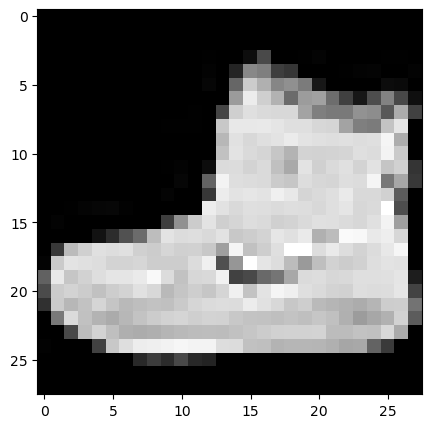

In [81]:
print(f"{y_train[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

### One-hot Encoding
The following code scales our training and testing data, reshapes our images and stores them in new variable names, and one-hot encodes the labels.

In [83]:
X = []
for x in X_train:
  X.append(x.flatten().reshape(784, 1))

# Y will temp store one-hot encoded label vectors
Y = []
for y in y_train:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

# Our data will be stored as a list of tuples. 
train_data = [p for p in zip(X, Y)]


p = train_data[0]
print(p[1])
print(y_train[0])

X = []
for x in X_test:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in y_test:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
9


###  Building the Network Architecture 
For our purposes, we will build a multilayered **fully connected**, or **dense**, neural network with $L$ layers, $784$ input notes, $L-2$ hidden layers of arbitrary size, and $10$ output nodes. 


For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C(W, b) = \frac{1}{2}\sum_{k=1}^{10}(\hat{y}^{(i)}_k - y^{(i)}_k)^2.
$$

Our goal will be to write a custom Python class implementing our desired structure. However, before doing so, we first sequentually write functions to better understand the process of programming the following:

* Initializing the weights and biases of each layer
* The feedforward phase
* Calculation of the cost function
* Calculation of the gradient
* Iterating stochastic gradient descent

First we will define our sigmoid activation function, its derivative, and the mean squared error for a single instance of training data. Do this by running the following code. 

In [85]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]
     


Next we will write a custom function to initialize the weight matrices and bias column vectors for a dense neural network. Do this by running the following code.

In [86]:

def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

### Feedforward Phase

For $\ell = 1, \dots, L$, each layer $\ell$ in our network will have two phases, the preactivation phase $$\mathbf{z}^{\ell} = W^{\ell}\mathbf{a}^{\ell-1} + \mathbf{b}^{\ell},$$ and postactivation phase $$\mathbf{a}^{\ell} = \sigma(\mathbf{z}^{\ell}).$$ The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. Note $\mathbf{a}^0 = \mathbf{x}^{(i)}$, where $\mathbf{x}^{(i)}$ is the current input data into our network. 

We can test our activation functions and matrix dimensions by running the following code which manually implements the feedforward process on a neural network with the given dimensions.

In [89]:
W, B = initialize_weights()

x, y = train_data[0]
a0 = x

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(y)}")
print(f"mse(y_hat, yi) = {mse(y_hat, y)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.297954623355667


Now, Let define the  MultilayerPerceptron class.

### Backpropogation Phase with Stochastic Gradient Descent 
We are now ready to define a custom Python ```DenseNetwork``` class which initializes the weights and bias for the network, and implements stochastic gradient descent shown below:

1. For each $i = 1, \dots, N$.
2. Feedforward $\mathbf{x}^{(i)}$ into the network. 
3. Compute $\delta^{L} = \nabla_aC\otimes \sigma'(\mathbf{z}^{L})$.
4. For $\ell = L-1, \dots, 1$, compute $\delta^{\ell} = \big ( (\mathbf{w}^{\ell + 1})^{T} \delta^{\ell + 1} \Big )\otimes \sigma'(\mathbf{z}^{\ell})$.
5. For $\ell = L, L-1, \dots, 1$, 

$$
w^{\ell} \leftarrow w^{\ell} - \alpha \delta^{\ell}(\mathbf{a}^{\ell-1})^{T}
$$

$$
b^{\ell} \leftarrow b^{\ell} - \alpha \delta^{\ell}
$$

In [109]:
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last   

In [110]:
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [111]:
alpha = 0.04
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

In [112]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

In [113]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)
     

In [114]:
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

/var/folders/jq/dmk6wkk55k500yv3vtcrjs0m0000gn/T/ipykernel_10209/4285135567.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Initial Cost = 1.3435707021617738


Predicted Value = 6
Actual Value = 6


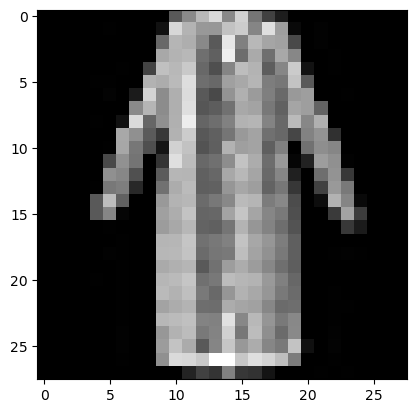

In [115]:
i = np.random.randint(0, len(X_test))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {y_test[i]}")
plt.imshow(X_test[i], cmap="gray")
plt.show()

In [117]:
def DenseNetwork(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")